<a href="https://colab.research.google.com/github/jtaru28912/MULTIMODAL-RAG-/blob/main/MultiModalRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-modal RAG System

Many documents contain a mixture of content types, including text, tables and images.

Yet, information captured in images is lost in most RAG applications.

With the emergence of multimodal LLMs, like [GPT-4o](https://openai.com/index/hello-gpt-4o/), it is worth considering how to utilize images in RAG Systems:


![](https://i.imgur.com/wcCDT38.gif)


In [ ]:
!pip install langchain==0.3.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.5/438.5 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65

In [ ]:
!pip install langchain-openai==0.2.8

  Using cached langchain_openai-0.2.8-py3-none-any.whl.metadata (2.6 kB)
  Using cached openai-1.109.1-py3-none-any.whl.metadata (29 kB)
Using cached langchain_openai-0.2.8-py3-none-any.whl (50 kB)
Using cached openai-1.109.1-py3-none-any.whl (948 kB)
  Attempting uninstall: openai
    Found existing installation: openai 2.21.0
    Uninstalling openai-2.21.0:
      Successfully uninstalled openai-2.21.0


In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.4/501.4 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.147
    Uninstalling langsmith-0.1.147:
      Successfully uninstalled langsmith-0.1.147
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63
  Attem

In [ ]:
!pip install langchain-chroma==0.1.4

  Using cached langchain_core-0.3.83-py3-none-any.whl.metadata (3.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.

In [ ]:
!pip install redis==5.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 22.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt') #punctuation mark
nltk.download('punkt_tab') #punctuation tab
nltk.download('averaged_perceptron_tagger')
# The 'averaged_perceptron_tagger' is a Part-of-Speech (POS) tagger. It's used in Natural Language Processing (NLP)
# to assign grammatical categories (like noun, verb, adjective) to words in a text.
# This is crucial for tasks like text analysis, information extraction, and machine translation.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
!pip install "unstructured[all-docs]"
# for parsing the data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 64.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of unstructured-inference to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 144.3 MB/s eta 0:00:00
   

In [ ]:
# install OCR dependencies for unstructured image processing
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 2s (119 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
d

In [ ]:
# extract table from pdf
!pip install htmltabletomd==1.0.0

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for htmltabletomd: filename=htmltabletomd-1.0.0-py2.py3-none-any.whl size=3579 sha256=3b88fac8383bbdb85a8bee9627f3e27f76e0efc29d96447682ceeb86d829b426
  Stored in directory: /root/.cache/pip/wheels/3a/43/12/cd68815191ac1155b7be7c08d8299fe94fc6410bbea4870210
  Created wheel for html2markdown: filename=html2markdown-0.1.7-py3-none-any.whl size=5233 sha256=3e3efacd90dd9dbc69e810500e6157ad4b1706e0ee585a6566cc3aaba64d5d78
  Stored in directory: /root/.cache/pip/wheels/a8/07/3d/d2e5d872cc76dc1662efbf51aaf0cbf5a860c9b3232f27f985
Successfully built htmltabletomd html2markdown


## Data Loading & Processing

### Partition PDF tables, text, and images
  

In [ ]:
!wget https://sgp.fas.org/crs/misc/IF10244.pdf
# website getting - download the pdf from online

--2026-02-20 08:59:05--  https://sgp.fas.org/crs/misc/IF10244.pdf
Resolving sgp.fas.org (sgp.fas.org)... 172.67.186.125, 104.21.19.144, 2606:4700:3037::6815:1390, ...
Connecting to sgp.fas.org (sgp.fas.org)|172.67.186.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: ‘IF10244.pdf.1’

IF10244.pdf.1           [ <=>                ] 425.61K  --.-KB/s    in 0.008s  

2026-02-20 08:59:05 (51.1 MB/s) - ‘IF10244.pdf.1’ saved [435826]



In [ ]:
# This command removes the 'figures' directory and all its contents recursively and forcefully.
# This is typically done to clean up previous outputs or temporary files.
!rm -rf ./figures

In [ ]:
# Extractig images and tables from unstructured.io
from langchain_community.document_loaders import UnstructuredPDFLoader

doc = '/content/IF10244.pdf'
# Extract tables
# takes 1-2 min on Colab
loader = UnstructuredPDFLoader(file_path=doc,
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               mode='elements',
                               image_output_dir_path='/content/figures')
data = loader.load()

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/367 [00:00<?, ?it/s]

In [ ]:
len(data)
# data

[Document(metadata={'source': '/content/IF10244.pdf', 'coordinates': {'points': ((np.float64(280.0), np.float64(3.4027777777779984)), (np.float64(280.0), np.float64(450.86805555555554)), (np.float64(2694.4652777777774), np.float64(450.86805555555554)), (np.float64(2694.4652777777774), np.float64(3.4027777777779984))), 'system': 'PixelSpace', 'layout_width': 2975, 'layout_height': 3850}, 'last_modified': '2024-04-10T01:27:48', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'image_path': '/content/figures/figure-1-1.jpg', 'file_directory': '/content', 'filename': 'IF10244.pdf', 'category': 'Image', 'element_id': '086ec41b6d56dbe293793a92dde403ca'}, page_content='—_~_ Informing the legislative debate since 1914 Congressional Research Service'),
 Document(metadata={'source': '/content/IF10244.pdf', 'detection_class_prob': 0.503221869468689, 'is_extracted': 'true', 'coordinates': {'points': ((np.float64(2269.21044921875), np.float64(456.7981262207031)), (np.float64(2

In [ ]:
# extracting table here
[doc.metadata['category'] for doc in data if doc.metadata['category'] == 'Table']

['Table', 'Table']

In [ ]:
tables = [doc for doc in data if doc.metadata['category'] == 'Table']
len(tables)

2

In [ ]:
loader = UnstructuredPDFLoader(file_path=doc,
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               chunking_strategy="by_title", # section-based chunking
                               max_characters=4000, # max size of chunks
                               new_after_n_chars=4000, # preferred size of chunks
                               overlap_n_chars=20, # overlap between chunks
                               combine_text_under_n_chars=2000, # smaller chunks < 2000 chars will be combined into a larger chunk
                               mode='elements',
                               image_output_dir_path='./figures')
texts = loader.load()
len(texts)

5

In [ ]:
data = texts + tables
data
len(data)
data[5]

Document(metadata={'source': '/content/IF10244.pdf', 'detection_class_prob': 0.9178280234336853, 'is_extracted': 'partial', 'coordinates': {'points': ((np.float64(290.24072265625), np.float64(2225.287353515625)), (np.float64(290.24072265625), np.float64(3444.363037109375)), (np.float64(1435.48974609375), np.float64(3444.363037109375)), (np.float64(1435.48974609375), np.float64(2225.287353515625))), 'system': 'PixelSpace', 'layout_width': 2975, 'layout_height': 3850}, 'last_modified': '2024-04-10T01:27:48', 'text_as_html': '<table><thead><tr><th></th><th>2018</th><th>2019</th><th>2020</th><th>2021</th><th>2022</th></tr></thead><tbody><tr><td colspan="6">Number of Fires (thousands)</td></tr><tr><td>Federal</td><td>12.5</td><td>10.9</td><td>14.4</td><td>14.0</td><td>11.7</td></tr><tr><td>FS</td><td>5.6</td><td>5.3</td><td>6.7</td><td>6.2</td><td>5.9</td></tr><tr><td>DO!</td><td>7.0</td><td>5.3</td><td>7.6</td><td>7.6</td><td>5.8</td></tr><tr><td>Other</td><td>0.1</td><td>0.2</td><td>&lt;0

In [ ]:
from IPython.display import HTML, display, Markdown

In [ ]:
print(data[2].page_content)

Resources

Another metric useful for assessing wildfire activity is the extent to which nationwide resources—including personnel and equipment—are engaged in wildfire suppression. A proxy for resource commitments is the nationwide Preparedness Level (PL) scale, which ranges from 1 (lowest) to 5 (highest). The higher PLs indicate significant commitment of shared resources. In 2022, the nationwide level was 4 for 10 days and never reached the highest level (5). In contrast, the highest level was reached for 68 days in 2021, the longest since at least 2000.

Wildfire Damages

Figure 3. Percentage Acreage Burned by Ownership

Non- | federal Other federal DOI Forest Service 2018 2019 2020 2021 2022

Wildfires may affect certain ecological resources beneficially, but wildfires also may have devastating impacts, especially for communities affected by wildfire activity. Statistics showing the level of destruction a wildfire caused can provide useful metrics to evaluate the fire’s effect. Such 

In [ ]:
print(data[1].metadata['text_as_html'])

<table><thead><tr><th></th><th>2018</th><th>2019</th><th>2020</th><th>2021</th><th>2022</th></tr></thead><tbody><tr><td colspan="6">Number of Fires (thousands)</td></tr><tr><td>Federal</td><td>12.5</td><td>10.9</td><td>14.4</td><td>14.0</td><td>11.7</td></tr><tr><td>FS</td><td>5.6</td><td>5.3</td><td>6.7</td><td>6.2</td><td>5.9</td></tr><tr><td>DO!</td><td>7.0</td><td>5.3</td><td>7.6</td><td>7.6</td><td>5.8</td></tr><tr><td>Other</td><td>0.1</td><td>0.2</td><td>&lt;0.!</td><td>0.2</td><td>0.1</td></tr><tr><td>Nonfederal</td><td>45.6</td><td>39.6</td><td>44.6</td><td>45.0</td><td>57.2</td></tr><tr><td>Total</td><td>58.1</td><td>50.5</td><td>59.0</td><td>59.0</td><td>69.0</td></tr><tr><td colspan="6">Acres Burned (millions)</td></tr><tr><td>Federal</td><td>4.6</td><td>3.1</td><td>7.1</td><td>5.2</td><td>4.0</td></tr><tr><td>FS</td><td>2.3</td><td>0.6</td><td>4.8</td><td>4.1</td><td>1.9</td></tr><tr><td>DO!</td><td>2.3</td><td>2.3</td><td>2.3</td><td>1.0</td><td>2.1</td></tr><tr><td>Other

In [ ]:
display(Markdown(data[1].metadata['text_as_html']))

<table><thead><tr><th></th><th>2018</th><th>2019</th><th>2020</th><th>2021</th><th>2022</th></tr></thead><tbody><tr><td colspan="6">Number of Fires (thousands)</td></tr><tr><td>Federal</td><td>12.5</td><td>10.9</td><td>14.4</td><td>14.0</td><td>11.7</td></tr><tr><td>FS</td><td>5.6</td><td>5.3</td><td>6.7</td><td>6.2</td><td>5.9</td></tr><tr><td>DO!</td><td>7.0</td><td>5.3</td><td>7.6</td><td>7.6</td><td>5.8</td></tr><tr><td>Other</td><td>0.1</td><td>0.2</td><td>&lt;0.!</td><td>0.2</td><td>0.1</td></tr><tr><td>Nonfederal</td><td>45.6</td><td>39.6</td><td>44.6</td><td>45.0</td><td>57.2</td></tr><tr><td>Total</td><td>58.1</td><td>50.5</td><td>59.0</td><td>59.0</td><td>69.0</td></tr><tr><td colspan="6">Acres Burned (millions)</td></tr><tr><td>Federal</td><td>4.6</td><td>3.1</td><td>7.1</td><td>5.2</td><td>4.0</td></tr><tr><td>FS</td><td>2.3</td><td>0.6</td><td>4.8</td><td>4.1</td><td>1.9</td></tr><tr><td>DO!</td><td>2.3</td><td>2.3</td><td>2.3</td><td>1.0</td><td>2.1</td></tr><tr><td>Other</td><td>&lt;0.</td><td>&lt;0.1</td><td>&lt;0.!</td><td>&lt;0.!</td><td>&lt;0.!</td></tr><tr><td>Nonfederal</td><td>4.1</td><td>1.6</td><td>3.1</td><td>1.9</td><td>3.6</td></tr><tr><td>Total</td><td>8.8</td><td>4.7</td><td>10.1</td><td>7.1</td><td>7.6</td></tr></tbody></table>

In [ ]:
# Since unstructured extracts the text from the table without any borders, we can use the HTML text and put it directly in prompts (LLMs understand HTML tables well) or even better convert HTML tables to Markdown tables as below

In [ ]:
import htmltabletomd

md_table = htmltabletomd.convert_table(data[1].metadata['text_as_html'])
print(md_table)

|  | 2018 | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Number of Fires (thousands) |
| Federal | 12.5 | 10.9 | 14.4 | 14.0 | 11.7 |
| FS | 5.6 | 5.3 | 6.7 | 6.2 | 5.9 |
| DO! | 7.0 | 5.3 | 7.6 | 7.6 | 5.8 |
| Other | 0.1 | 0.2 | &lt;0.! | 0.2 | 0.1 |
| Nonfederal | 45.6 | 39.6 | 44.6 | 45.0 | 57.2 |
| Total | 58.1 | 50.5 | 59.0 | 59.0 | 69.0 |
| Acres Burned (millions) |
| Federal | 4.6 | 3.1 | 7.1 | 5.2 | 4.0 |
| FS | 2.3 | 0.6 | 4.8 | 4.1 | 1.9 |
| DO! | 2.3 | 2.3 | 2.3 | 1.0 | 2.1 |
| Other | &lt;0. | &lt;0.1 | &lt;0.! | &lt;0.! | &lt;0.! |
| Nonfederal | 4.1 | 1.6 | 3.1 | 1.9 | 3.6 |
| Total | 8.8 | 4.7 | 10.1 | 7.1 | 7.6 |



## Separate Data into Text and Table Elements

In [ ]:
docs = []
tables = []

for doc in data:
  if doc.metadata['category'] =='Table':
    tables.append(doc)
  elif doc.metadata['category'] =='NarrativeText':
    docs.append(doc)
  elif doc.metadata['category'] =='Title':
    docs.append(doc)
  elif doc.metadata['category'] =='FigureCaption':
    docs.append(doc)
  elif doc.metadata['category'] =='UncategorizedText':
    docs.append(doc)
  elif doc.metadata['category'] =='Header':
    docs.append(doc)
  else:
    docs.append(doc)

In [ ]:
print(len(docs))
print(len(tables))

5
2


# CONVERT HTML TABLES TO MARKDOWN

In [ ]:
# convert html tables into markdown

for table in tables:
    table.page_content = htmltabletomd.convert_table(table.metadata['text_as_html'])

for table in tables:
    print(table.page_content)
    print()

|  | 2018 | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Number of Fires (thousands) |
| Federal | 12.5 | 10.9 | 14.4 | 14.0 | 11.7 |
| FS | 5.6 | 5.3 | 6.7 | 6.2 | 5.9 |
| DO! | 7.0 | 5.3 | 7.6 | 7.6 | 5.8 |
| Other | 0.1 | 0.2 | &lt;0.! | 0.2 | 0.1 |
| Nonfederal | 45.6 | 39.6 | 44.6 | 45.0 | 57.2 |
| Total | 58.1 | 50.5 | 59.0 | 59.0 | 69.0 |
| Acres Burned (millions) |
| Federal | 4.6 | 3.1 | 7.1 | 5.2 | 4.0 |
| FS | 2.3 | 0.6 | 4.8 | 4.1 | 1.9 |
| DO! | 2.3 | 2.3 | 2.3 | 1.0 | 2.1 |
| Other | &lt;0. | &lt;0.1 | &lt;0.! | &lt;0.! | &lt;0.! |
| Nonfederal | 4.1 | 1.6 | 3.1 | 1.9 | 3.6 |
| Total | 8.8 | 4.7 | 10.1 | 7.1 | 7.6 |


|  | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |




In [ ]:
# Viwe extracted image

! ls -l ./figures

total 280
-rw-r--r-- 1 root root 54966 Feb 20 09:28 figure-1-1.jpg
-rw-r--r-- 1 root root 53803 Feb 20 09:28 figure-1-2.jpg
-rw-r--r-- 1 root root 54003 Feb 20 09:28 figure-1-3.jpg
-rw-r--r-- 1 root root 50507 Feb 20 09:29 figure-2-4.jpg
-rw-r--r-- 1 root root 57799 Feb 20 09:29 figure-2-5.jpg


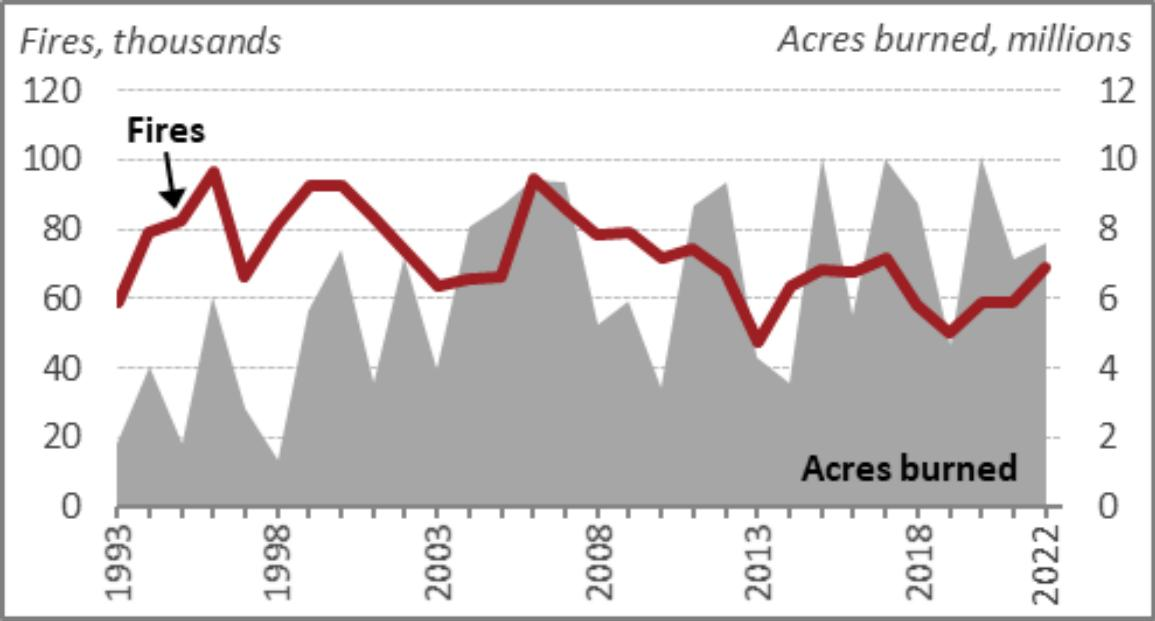

In [ ]:
from IPython.display import Image

Image('./figures/figure-1-1.jpg')
Image('./figures/figure-1-2.jpg')

In [ ]:
### Enter Open AI API Key


from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')



import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY


Enter Open AI API Key: ··········


In [ ]:
### Load Connection to LLM

# Here we create a connection to ChatGPT to use later in our chains

In [ ]:
from langchain_openai import ChatOpenAI

# Pass the API key explicitly to the ChatOpenAI constructor
chatgpt = ChatOpenAI(model_name='gpt-4o', temperature=0, api_key=openai_key)



### Text and Table summaries

We will use GPT-4o to produce table and, text summaries.

Text summaries are advised if using large chunk sizes (e.g., as set above, we use 4k token chunks).

Summaries are used to retrieve raw tables and / or raw chunks of text.

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

In [ ]:

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text particularly for semantic retrieval.
These summaries will be embedded and used to retrieve the raw text or table elements
Give a detailed summary of the table or text below that is well optimized for retrieval.
For any tables also add in a one line description of what the table is about besides the summary.
Do not add redundant words like Summary.
Just output the actual summary content.

Table or text chunk:
{element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
summarize_chain = (
                    {"element": RunnablePassthrough()}
                      |
                    prompt
                      |
                    chatgpt
                      |
                    StrOutputParser() # extracts the response as text and returns it as a string
)

# Initialize empty summaries
text_summaries = []
table_summaries = []

text_docs = [doc.page_content for doc in docs]
table_docs = [table.page_content for table in tables]

text_summaries = summarize_chain.batch(text_docs, {"max_concurrency": 5})
table_summaries = summarize_chain.batch(table_docs, {"max_concurrency": 5})

len(text_summaries), len(table_summaries)

(5, 2)

# IMAGE SUMMARIZATION VIA LLM

In [ ]:
import base64
import os

from langchain_core.messages import HumanMessage


def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", temperature=0)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content


def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval.
                Remember these images could potentially contain graphs, charts or tables also.
                These summaries will be embedded and used to retrieve the raw image for question answering.
                Give a detailed summary of the image that is well optimized for retrieval.
                Do not add additional words like Summary, This image represents, etc.
             """

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries


# Image summaries
IMG_PATH = './figures'
imgs_base64, image_summaries = generate_img_summaries(IMG_PATH)

In [ ]:
len(imgs_base64), len(image_summaries)

(5, 5)

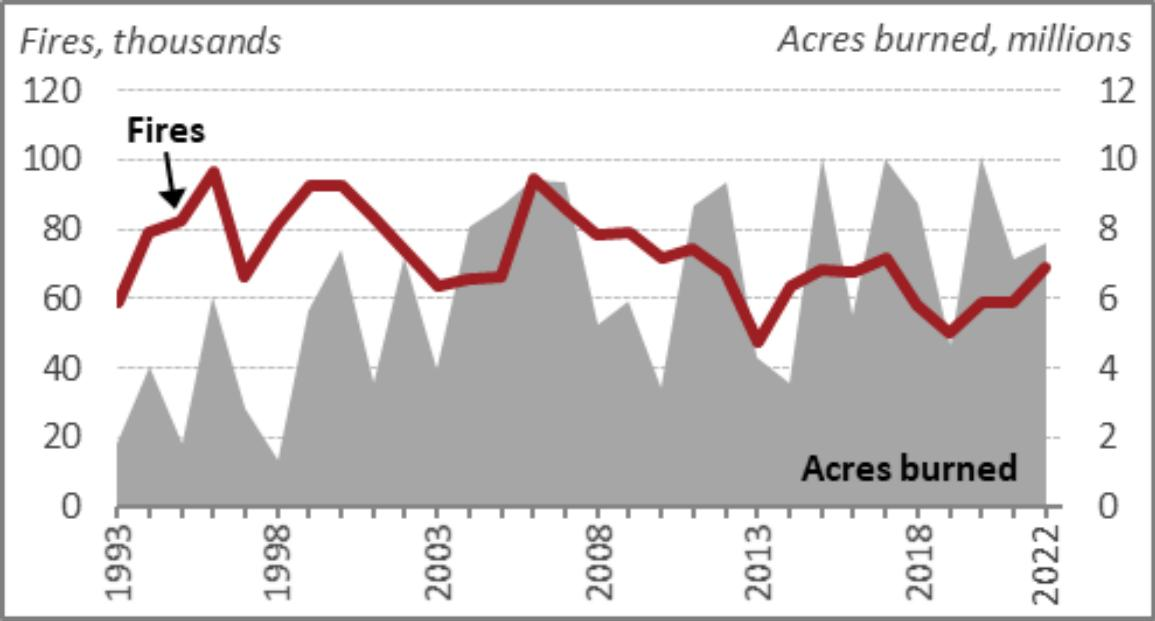

In [ ]:
display(Image('./figures/figure-1-2.jpg'))

In [ ]:
display(Markdown(image_summaries[1]))

Line graph depicting the number of fires and acres burned from 1993 to 2022. The left y-axis represents fires in thousands, while the right y-axis shows acres burned in millions. The x-axis displays years. A red line indicates the number of fires, peaking around 1996 and 2006, with fluctuations throughout the period. A gray area represents acres burned, showing significant peaks around 2006, 2012, and 2020. The graph highlights trends in fire occurrences and the extent of land affected over nearly three decades.

## Multi-vector retriever

Use [multi-vector-retriever](https://python.langchain.com/docs/modules/data_connection/retrievers/multi_vector#summary) to index image (and / or text, table) summaries, but retrieve raw images (along with raw texts or tables).

### Download and Install Redis as a DocStore

You can use any other database or cache as a docstore to store the raw text, table and image elements

In [ ]:
%%sh
curl -fsSL https://packages.redis.io/gpg | sudo gpg --dearmor -o /usr/share/keyrings/redis-archive-keyring.gpg
echo "deb [signed-by=/usr/share/keyrings/redis-archive-keyring.gpg] https://packages.redis.io/deb $(lsb_release -cs) main" | sudo tee /etc/apt/sources.list.d/redis.list
sudo apt-get update  > /dev/null 2>&1
sudo apt-get install redis-stack-server  > /dev/null 2>&1
redis-stack-server --daemonize yes

deb [signed-by=/usr/share/keyrings/redis-archive-keyring.gpg] https://packages.redis.io/deb jammy main
Starting redis-stack-server, database path /var/lib/redis-stack


### Open AI Embedding Models

LangChain enables us to access Open AI embedding models which include the newest models: a smaller and highly efficient `text-embedding-3-small` model, and a larger and more powerful `text-embedding-3-large` model.

In [ ]:
from langchain_openai import OpenAIEmbeddings

# details here: https://openai.com/blog/new-embedding-models-and-api-updates
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')


### Add to vectorstore & docstore

Add raw docs and doc summaries to [Multi Vector Retriever](https://python.langchain.com/docs/modules/data_connection/retrievers/multi_vector#summary):

* Store the raw texts, tables, and images in the `docstore` (here we are using Redis).
* Store the texts, table summaries, and image summaries and their corresponding embeddings in the `vectorstore` (here we are using Chroma) for efficient semantic retrieval.
* Connect them using a common `document_id`

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.storage import RedisStore
from langchain_community.utilities.redis import get_client
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings


def create_multi_vector_retriever(
    docstore, vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """


    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=docstore,
        id_key=id_key,
    )

    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add texts, tables, and images
    # Check that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)
    # Check that table_summaries is not empty before adding
    if table_summaries:
        add_documents(retriever, table_summaries, tables)
    # Check that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever


# The vectorstore to use to index the summaries and their embeddings
chroma_db = Chroma(
    collection_name="mm_rag",
    embedding_function=openai_embed_model,
    collection_metadata={"hnsw:space": "cosine"},
)

# Initialize the storage layer - to store raw images, text and tables
client = get_client('redis://localhost:6379')
redis_store = RedisStore(client=client) # you can use filestore, memorystory, any other DB store also

# Create retriever
retriever_multi_vector = create_multi_vector_retriever(
    redis_store,
    chroma_db,
    text_summaries,
    text_docs,
    table_summaries,
    table_docs,
    image_summaries,
    imgs_base64,
)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [ ]:
retriever_multi_vector

MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x7f13d0e2adb0>, docstore=<langchain_community.storage.redis.RedisStore object at 0x7f13a9d066c0>, search_kwargs={})

## Test Multimodal RAG Retriever


In [ ]:
from IPython.display import HTML, display, Image
from PIL import Image
import base64
from io import BytesIO

def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Decode the base64 string
    img_data = base64.b64decode(img_base64)
    # Create a BytesIO object
    img_buffer = BytesIO(img_data)
    # Open the image using PIL
    img = Image.open(img_buffer)
    display(img)

In [ ]:
# CHECK RETRIEVAL
query = "Analyze the wildfires trend with acres burned over the years"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 3 docs
len(docs)

docs

[b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJtBIMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDZ0nSbrxPfSqsyJIigksK2v+FcX/8Az9w/kaPhx/yFbr/rkP516ZQB5n/wri//AOfuH8jR/wAK4v8A/n7h/I16ZRQB5n/wri//AOfuH8jR/wAK4v8A/n7h/I16ZRQB5n/wri//AOfuH8jR/wAK4v8A/n7h/I16ZRQB5n/wr

In [ ]:
# Check retrieval
query = "Tell me about the percentage of residences burned by wildfires in 2022"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 4 docs
len(docs)
docs

[b'|  | 2019 | 2020 | 2021 | 2022 |\n| :--- | :--- | :--- | :--- | :--- |\n| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |\n| % Residences | 46% | 54% | 60% | 46% |\n',
 b'Figure 4. Acreage Burned by Region and Ownership\n\nAcres burned, millions East Nonfederal East Federal West Nonfederal West Federal 2018 2019 2020 2021 2022\n\n2019 2020 2021 2022 Structures Burned 963 17,904 5,972 2,717 % Residences 46% 54% 60% 46%\n\nSource: NICC Wildland Fire Summary and Statistics annual reports.\n\nConflagrations\n\nOf the 1.6 million wildfires that have occurred since 2000, 254 exceeded 100,000 acres burned and 16 exceeded 500,000 acres burned. A small fraction of wildfires become catastrophic, and a small percentage of fires accounts for the vast majority of acres burned. For example, about 1% of wildfires become conflagrations\xe2\x80\x94raging, destructive fires\xe2\x80\x94but predicting which fires will \xe2\x80\x9cblow up\xe2\x80\x9d into conflagrations is challenging and depends on 

## Utilities to separate retrieved elements

We need to bin the retrieved doc(s) into the correct parts of the GPT-4o prompt template.

Here we need to have text, table elements as one set of inputs and image elements as the other set of inputs as both require separate prompts in GPT-4o.

In [ ]:
import re
import base64

def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []
    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content.decode('utf-8')
        else:
            doc = doc.decode('utf-8')
        if looks_like_base64(doc) and is_image_data(doc):
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}

In [ ]:
# Check retrieval
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 3 docs
len(docs)
docs

[b'Figure 4. Acreage Burned by Region and Ownership\n\nAcres burned, millions East Nonfederal East Federal West Nonfederal West Federal 2018 2019 2020 2021 2022\n\n2019 2020 2021 2022 Structures Burned 963 17,904 5,972 2,717 % Residences 46% 54% 60% 46%\n\nSource: NICC Wildland Fire Summary and Statistics annual reports.\n\nConflagrations\n\nOf the 1.6 million wildfires that have occurred since 2000, 254 exceeded 100,000 acres burned and 16 exceeded 500,000 acres burned. A small fraction of wildfires become catastrophic, and a small percentage of fires accounts for the vast majority of acres burned. For example, about 1% of wildfires become conflagrations\xe2\x80\x94raging, destructive fires\xe2\x80\x94but predicting which fires will \xe2\x80\x9cblow up\xe2\x80\x9d into conflagrations is challenging and depends on a multitude of factors, such as weather and geography. There have been 1,041 large or significant fires annually on average from 2018 through 2022. In 2022, 2% of wildfires w

In [ ]:
is_image_data(docs[2].decode('utf-8'))

True

In [ ]:
r = split_image_text_types(docs)
r

{'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJDBKsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDqvDnhxfEK3Esty0bIwHAzmt3/AIVzD/z/AEn/AHyKPhz/AMe15/vj+VdxQBw//CuYf+f6T/vkUf8ACuYf+f6T/vkV3FFAHD/8K5h/5/pP++RR/wAK5h/5/pP++RXcUUAcP/wrmH/n+k/75FH/AArmH/n+k/7

# BUILD END TO END RAG PIPELINE for MULTIMODAL RAG

In [ ]:
from operator import itemgetter
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_core.messages import HumanMessage

def multimodal_prompt_function(data_dict):
    """
    Create a multimodal prompt with both text and image context.

    This function formats the provided context from `data_dict`, which contains
    text, tables, and base64-encoded images. It joins the text (with table) portions
    and prepares the image(s) in a base64-encoded format to be included in a message.

    The formatted text and images (context) along with the user question are used to
    construct a prompt for GPT-4o
    """
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text and tables for analysis
    text_message = {
        "type": "text",
        "text": (
            f"""You are an analyst tasked with understanding detailed information and trends
                from text documents, data tables, and charts and graphs in images.
                You will be given context information below which will be a mix of text, tables,
                and images usually of charts or graphs.
                Use this information to provide answers related to the user question.
                Analyze all the context information including tables, text and images to generate the answer.
                Do not make up answers, If the question context is not present in the document just say dont know the answer and in that case please dont generate any sources.
                use the provided context documents below
                and answer the question to the best of your ability.

                User question:
                {data_dict['question']}

                Context documents:
                {formatted_texts}

                Answer:
            """
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]


# Create RAG chain
multimodal_rag = (
        {
            "context": itemgetter('context'),
            "question": itemgetter('input'),
        }
            |
        RunnableLambda(multimodal_prompt_function)
            |
        chatgpt
            |
        StrOutputParser()
)

# Pass input query to retriever and get context document elements
retrieve_docs = (itemgetter('input')
                    |
                retriever_multi_vector
                    |
                RunnableLambda(split_image_text_types))

# Below, we chain `.assign` calls. This takes a dict and successively
# adds keys-- "context" and "answer"-- where the value for each key
# is determined by a Runnable (function or chain executing at runtime).
# This helps in also having the retrieved context along with the answer generated by GPT-4o
multimodal_rag_w_sources = (RunnablePassthrough.assign(context=retrieve_docs)
                                               .assign(answer=multimodal_rag)
)

In [ ]:
# Run RAG chain
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
response = multimodal_rag_w_sources.invoke({'input': query})
response

{'input': 'Tell me detailed statistics of the top 5 years with largest wildfire acres burned',
 'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJDBKsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDqvDnhxfEK3Esty0bIwHAzmt3/AIVzD/z/AEn/AHyKPhz/AMe1

In [ ]:
def multimodal_rag_qa(query):
    response = multimodal_rag_w_sources.invoke({'input': query})
    print('=='*50)
    print('Answer:')
    display(Markdown(response['answer']))
    print('--'*50)
    print('Sources:')
    text_sources = response['context']['texts']
    img_sources = response['context']['images']
    for text in text_sources:
        display(Markdown(text))
        print()
    for img in img_sources:
        plt_img_base64(img)
        print()
    print('=='*50)

Answer:


Based on the provided context, here are the detailed statistics for the top 5 years with the largest wildfire acres burned:

1. **2015**
   - Acres Burned: 10.13 million
   - Number of Fires: 68,200

2. **2020**
   - Acres Burned: 10.12 million
   - Number of Fires: 59,000

3. **2017**
   - Acres Burned: 10.03 million
   - Number of Fires: 71,500

4. **2006**
   - Acres Burned: 9.87 million
   - Number of Fires: 96,400

5. **2007**
   - Acres Burned: 9.33 million
   - Number of Fires: 67,800

These statistics highlight the years with the most significant wildfire activity in terms of acres burned.

----------------------------------------------------------------------------------------------------
Sources:


Figure 4. Acreage Burned by Region and Ownership

Acres burned, millions East Nonfederal East Federal West Nonfederal West Federal 2018 2019 2020 2021 2022

2019 2020 2021 2022 Structures Burned 963 17,904 5,972 2,717 % Residences 46% 54% 60% 46%

Source: NICC Wildland Fire Summary and Statistics annual reports.

Conflagrations

Of the 1.6 million wildfires that have occurred since 2000, 254 exceeded 100,000 acres burned and 16 exceeded 500,000 acres burned. A small fraction of wildfires become catastrophic, and a small percentage of fires accounts for the vast majority of acres burned. For example, about 1% of wildfires become conflagrations—raging, destructive fires—but predicting which fires will “blow up” into conflagrations is challenging and depends on a multitude of factors, such as weather and geography. There have been 1,041 large or significant fires annually on average from 2018 through 2022. In 2022, 2% of wildfires were classified as large or significant (1,289); 45 exceeded 40,000 acres in size, and 17 exceeded 100,000 acres. For context, there were fewer large or significant wildfires in 2021 (943) but more in 2017 (1,409).

Issues for Congress

Issues Congress may consider include the strategies and resources used for wildfire prevention, mitigation, and management, as well as wildfires’ impact on both the quality of life and the economies of communities affected by wildfire activity. Other issues relate to post-wildfire recovery and site restoration. Congress also considers the total federal cost of wildfire management, including the cost of suppression operations; these costs vary annually and are difficult to predict.

Source: NICC Wildland Fire Summary and Statistics annual reports. Notes: West: AK, AZ, CA, CO, ID, HI, MT, NM, NV, OR, UT, WA, and WY. East: All other states and Puerto Rico.

Katie Hoover, Specialist in Natural Resources Policy Laura A. Hanson, Senior Research Librarian

IF10244

https://crsreports.congress.gov

Wildfire Statistics

—_~_ Informing the legislative debate since 1914 Congressional Research Service

Updated June 1, 2023

Wildfire Statistics

Wildfires are unplanned fires, including lightning-caused fires, unauthorized human-caused fires, and escaped fires from prescribed burn projects. States are responsible for responding to wildfires that begin on nonfederal (state, local, and private) lands, except for lands protected by federal agencies under cooperative agreements. The federal government is responsible for responding to wildfires that begin on federal lands. The Forest Service (FS)—within the U.S. Department of Agriculture—carries out wildfire management and response across the 193 million acres of the National Forest System (NFS). The Department of the Interior (DOI) manages wildfire response for more than 400 million acres of national parks, wildlife refuges and preserves, other public lands, and Indian reservations.

Figure 1. Annual Wildfires and Acres Burned, 1993-2022

Fires, thousands Acres burned, millions 120 Fires 4

Wildfire statistics help illustrate past U.S. wildfire activity. Nationwide data compiled by the National Interagency Coordination Center (NICC) indicate that the number of annual wildfires is variable but has decreased slightly over the last 30 years. The number of acres affected annually, while also variable, generally has increased (see Figure 1). Since 2000, an annual average of 70,025 wildfires have burned an annual average of 7.0 million acres. The acreage figure is more than double the average annual acreage burned in the 1990s (3.3 million acres), although a greater number of fires occurred annually in the 1990s on average (78,600).

Source: NICC Wildland Fire Summary and Statistics annual reports. Note: Data reflect wildland fires and acres burned nationwide, including wildland fires on federal and nonfederal lands.

From 2013 to 2022, there were an average of 61,410 wildfires annually and an average of 7.2 million acres impacted annually. In 2022, 68,988 wildfires burned 7.6 million acres. Over 40% of those acres were in Alaska (3.1 million acres).

As of June 1, 2023, around 18,300 wildfires have impacted over 511,000 acres this year.

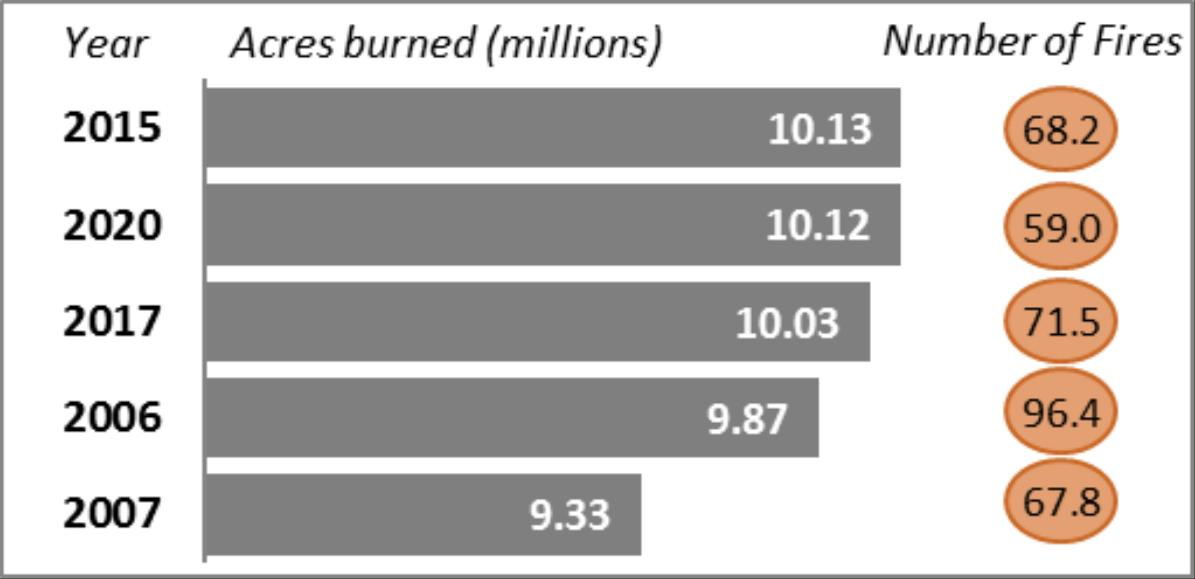

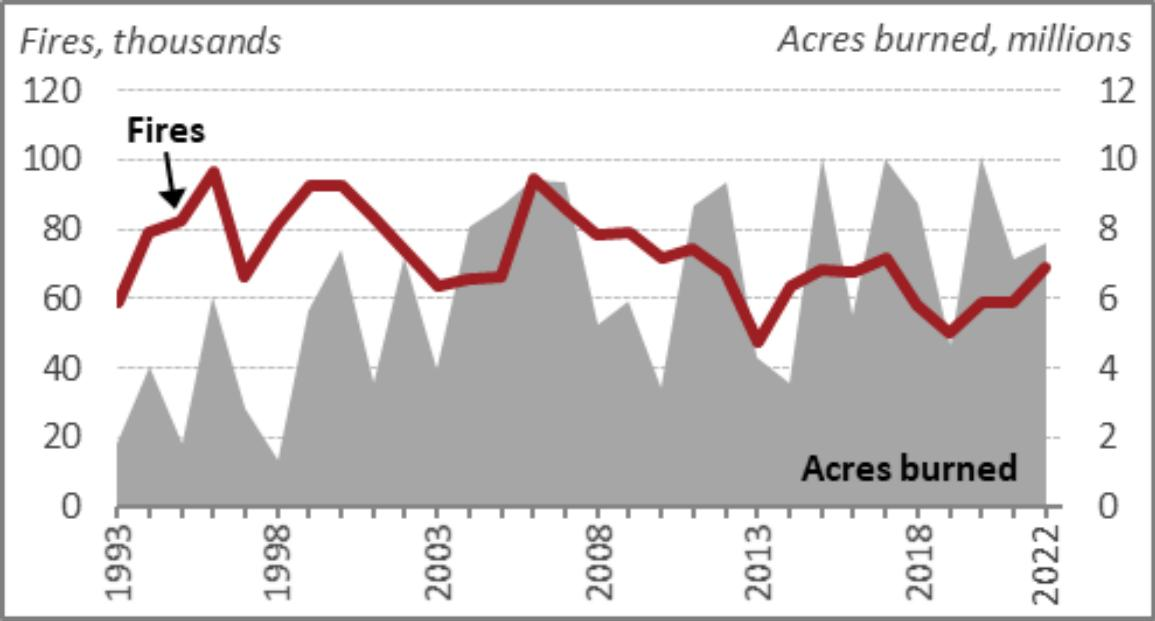

In [ ]:
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
multimodal_rag_qa(query)

In [ ]:
# Run RAG chain
query = "Tell me about the percentage of residences burned by wildfires in 2022"
multimodal_rag_qa(query)

Answer:


In 2022, 46% of the structures burned by wildfires were residences.

----------------------------------------------------------------------------------------------------
Sources:


|  | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |


Figure 4. Acreage Burned by Region and Ownership

Acres burned, millions East Nonfederal East Federal West Nonfederal West Federal 2018 2019 2020 2021 2022

2019 2020 2021 2022 Structures Burned 963 17,904 5,972 2,717 % Residences 46% 54% 60% 46%

Source: NICC Wildland Fire Summary and Statistics annual reports.

Conflagrations

Of the 1.6 million wildfires that have occurred since 2000, 254 exceeded 100,000 acres burned and 16 exceeded 500,000 acres burned. A small fraction of wildfires become catastrophic, and a small percentage of fires accounts for the vast majority of acres burned. For example, about 1% of wildfires become conflagrations—raging, destructive fires—but predicting which fires will “blow up” into conflagrations is challenging and depends on a multitude of factors, such as weather and geography. There have been 1,041 large or significant fires annually on average from 2018 through 2022. In 2022, 2% of wildfires were classified as large or significant (1,289); 45 exceeded 40,000 acres in size, and 17 exceeded 100,000 acres. For context, there were fewer large or significant wildfires in 2021 (943) but more in 2017 (1,409).

Issues for Congress

Issues Congress may consider include the strategies and resources used for wildfire prevention, mitigation, and management, as well as wildfires’ impact on both the quality of life and the economies of communities affected by wildfire activity. Other issues relate to post-wildfire recovery and site restoration. Congress also considers the total federal cost of wildfire management, including the cost of suppression operations; these costs vary annually and are difficult to predict.

Source: NICC Wildland Fire Summary and Statistics annual reports. Notes: West: AK, AZ, CA, CO, ID, HI, MT, NM, NV, OR, UT, WA, and WY. East: All other states and Puerto Rico.

Katie Hoover, Specialist in Natural Resources Policy Laura A. Hanson, Senior Research Librarian

IF10244

https://crsreports.congress.gov

Wildfire Statistics

—_~_ Informing the legislative debate since 1914 Congressional Research Service

Updated June 1, 2023

Wildfire Statistics

Wildfires are unplanned fires, including lightning-caused fires, unauthorized human-caused fires, and escaped fires from prescribed burn projects. States are responsible for responding to wildfires that begin on nonfederal (state, local, and private) lands, except for lands protected by federal agencies under cooperative agreements. The federal government is responsible for responding to wildfires that begin on federal lands. The Forest Service (FS)—within the U.S. Department of Agriculture—carries out wildfire management and response across the 193 million acres of the National Forest System (NFS). The Department of the Interior (DOI) manages wildfire response for more than 400 million acres of national parks, wildlife refuges and preserves, other public lands, and Indian reservations.

Figure 1. Annual Wildfires and Acres Burned, 1993-2022

Fires, thousands Acres burned, millions 120 Fires 4

Wildfire statistics help illustrate past U.S. wildfire activity. Nationwide data compiled by the National Interagency Coordination Center (NICC) indicate that the number of annual wildfires is variable but has decreased slightly over the last 30 years. The number of acres affected annually, while also variable, generally has increased (see Figure 1). Since 2000, an annual average of 70,025 wildfires have burned an annual average of 7.0 million acres. The acreage figure is more than double the average annual acreage burned in the 1990s (3.3 million acres), although a greater number of fires occurred annually in the 1990s on average (78,600).

Source: NICC Wildland Fire Summary and Statistics annual reports. Note: Data reflect wildland fires and acres burned nationwide, including wildland fires on federal and nonfederal lands.

From 2013 to 2022, there were an average of 61,410 wildfires annually and an average of 7.2 million acres impacted annually. In 2022, 68,988 wildfires burned 7.6 million acres. Over 40% of those acres were in Alaska (3.1 million acres).

As of June 1, 2023, around 18,300 wildfires have impacted over 511,000 acres this year.

Resources

Another metric useful for assessing wildfire activity is the extent to which nationwide resources—including personnel and equipment—are engaged in wildfire suppression. A proxy for resource commitments is the nationwide Preparedness Level (PL) scale, which ranges from 1 (lowest) to 5 (highest). The higher PLs indicate significant commitment of shared resources. In 2022, the nationwide level was 4 for 10 days and never reached the highest level (5). In contrast, the highest level was reached for 68 days in 2021, the longest since at least 2000.

Wildfire Damages

Figure 3. Percentage Acreage Burned by Ownership

Non- | federal Other federal DOI Forest Service 2018 2019 2020 2021 2022

Wildfires may affect certain ecological resources beneficially, but wildfires also may have devastating impacts, especially for communities affected by wildfire activity. Statistics showing the level of destruction a wildfire caused can provide useful metrics to evaluate the fire’s effect. Such statistics may include acres burned or impacted, lives lost (firefighters and civilians), and structures (residential, commercial, and other) destroyed. For example, in 2022, over 2,700 structures were burned in wildfires; the majority of the damage occurred in California (see Table 2).

Table 2. Loss Statistics

Source: NICC Wildland Fire Summary and Statistics annual reports. Note: DOI = Department of the Interior.

More wildfires occur in the East (including the central states), but the wildfires in the West (i.e., Alaska, Arizona, California, Colorado, Idaho, Montana, New Mexico, Nevada, Oregon, Utah, Washington, and Wyoming) are larger and burn more acreage. In 2022, just over 20,000 wildfires burned approximately 5.8 million acres in the West, compared with the over 48,000 fires that burned just over 1.8 million acres in the East. In the East (where there is less federal acreage), most of the fires occur on nonfederal lands; in the West, most of the fires occur on federal lands (see Figure 4). In 2022, 85% (1.5 million acres) of the acreage burned in the East was on nonfederal land, whereas 64% (3.7 million acres) of the acreage burned in the West was on federal land.

Answer:


The analysis of wildfire trends and acres burned over the years reveals several key points:

1. **Decrease in Number of Fires**: The number of annual wildfires has slightly decreased over the last 30 years. In the 1990s, there was an average of 78,600 wildfires annually, compared to an average of 70,025 wildfires since 2000.

2. **Increase in Acres Burned**: Despite the decrease in the number of fires, the number of acres burned annually has generally increased. The average annual acreage burned since 2000 is 7.0 million acres, more than double the average annual acreage burned in the 1990s (3.3 million acres).

3. **Recent Trends (2013-2022)**: From 2013 to 2022, there was an average of 61,410 wildfires annually, with an average of 7.2 million acres impacted each year. In 2022, 68,988 wildfires burned 7.6 million acres, with over 40% of those acres in Alaska.

4. **Significant Years**: Some years, such as 2015, 2020, and 2017, saw over 10 million acres burned, indicating particularly severe wildfire seasons.

5. **Conflagrations**: A small fraction of wildfires become catastrophic, accounting for the majority of acres burned. For example, in 2022, 2% of wildfires were classified as large or significant, with several exceeding 100,000 acres.

Overall, while the number of wildfires has decreased slightly, the severity in terms of acres burned has increased, highlighting the growing intensity of wildfires over the years.

----------------------------------------------------------------------------------------------------
Sources:


Figure 4. Acreage Burned by Region and Ownership

Acres burned, millions East Nonfederal East Federal West Nonfederal West Federal 2018 2019 2020 2021 2022

2019 2020 2021 2022 Structures Burned 963 17,904 5,972 2,717 % Residences 46% 54% 60% 46%

Source: NICC Wildland Fire Summary and Statistics annual reports.

Conflagrations

Of the 1.6 million wildfires that have occurred since 2000, 254 exceeded 100,000 acres burned and 16 exceeded 500,000 acres burned. A small fraction of wildfires become catastrophic, and a small percentage of fires accounts for the vast majority of acres burned. For example, about 1% of wildfires become conflagrations—raging, destructive fires—but predicting which fires will “blow up” into conflagrations is challenging and depends on a multitude of factors, such as weather and geography. There have been 1,041 large or significant fires annually on average from 2018 through 2022. In 2022, 2% of wildfires were classified as large or significant (1,289); 45 exceeded 40,000 acres in size, and 17 exceeded 100,000 acres. For context, there were fewer large or significant wildfires in 2021 (943) but more in 2017 (1,409).

Issues for Congress

Issues Congress may consider include the strategies and resources used for wildfire prevention, mitigation, and management, as well as wildfires’ impact on both the quality of life and the economies of communities affected by wildfire activity. Other issues relate to post-wildfire recovery and site restoration. Congress also considers the total federal cost of wildfire management, including the cost of suppression operations; these costs vary annually and are difficult to predict.

Source: NICC Wildland Fire Summary and Statistics annual reports. Notes: West: AK, AZ, CA, CO, ID, HI, MT, NM, NV, OR, UT, WA, and WY. East: All other states and Puerto Rico.

Katie Hoover, Specialist in Natural Resources Policy Laura A. Hanson, Senior Research Librarian

IF10244

https://crsreports.congress.gov

Wildfire Statistics

—_~_ Informing the legislative debate since 1914 Congressional Research Service

Updated June 1, 2023

Wildfire Statistics

Wildfires are unplanned fires, including lightning-caused fires, unauthorized human-caused fires, and escaped fires from prescribed burn projects. States are responsible for responding to wildfires that begin on nonfederal (state, local, and private) lands, except for lands protected by federal agencies under cooperative agreements. The federal government is responsible for responding to wildfires that begin on federal lands. The Forest Service (FS)—within the U.S. Department of Agriculture—carries out wildfire management and response across the 193 million acres of the National Forest System (NFS). The Department of the Interior (DOI) manages wildfire response for more than 400 million acres of national parks, wildlife refuges and preserves, other public lands, and Indian reservations.

Figure 1. Annual Wildfires and Acres Burned, 1993-2022

Fires, thousands Acres burned, millions 120 Fires 4

Wildfire statistics help illustrate past U.S. wildfire activity. Nationwide data compiled by the National Interagency Coordination Center (NICC) indicate that the number of annual wildfires is variable but has decreased slightly over the last 30 years. The number of acres affected annually, while also variable, generally has increased (see Figure 1). Since 2000, an annual average of 70,025 wildfires have burned an annual average of 7.0 million acres. The acreage figure is more than double the average annual acreage burned in the 1990s (3.3 million acres), although a greater number of fires occurred annually in the 1990s on average (78,600).

Source: NICC Wildland Fire Summary and Statistics annual reports. Note: Data reflect wildland fires and acres burned nationwide, including wildland fires on federal and nonfederal lands.

From 2013 to 2022, there were an average of 61,410 wildfires annually and an average of 7.2 million acres impacted annually. In 2022, 68,988 wildfires burned 7.6 million acres. Over 40% of those acres were in Alaska (3.1 million acres).

As of June 1, 2023, around 18,300 wildfires have impacted over 511,000 acres this year.

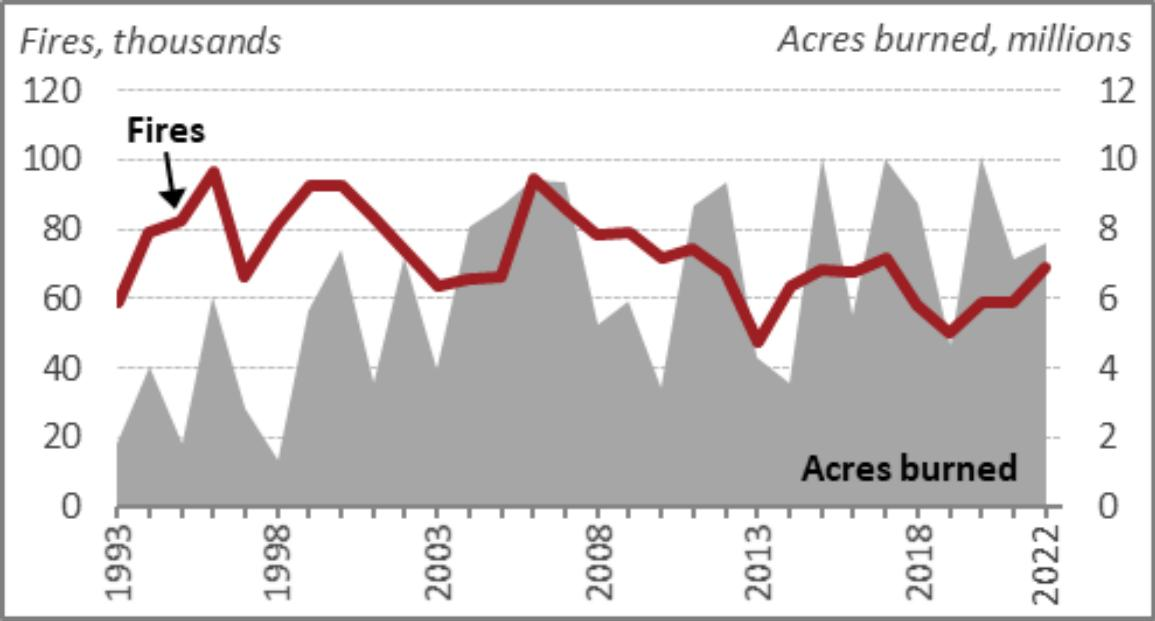

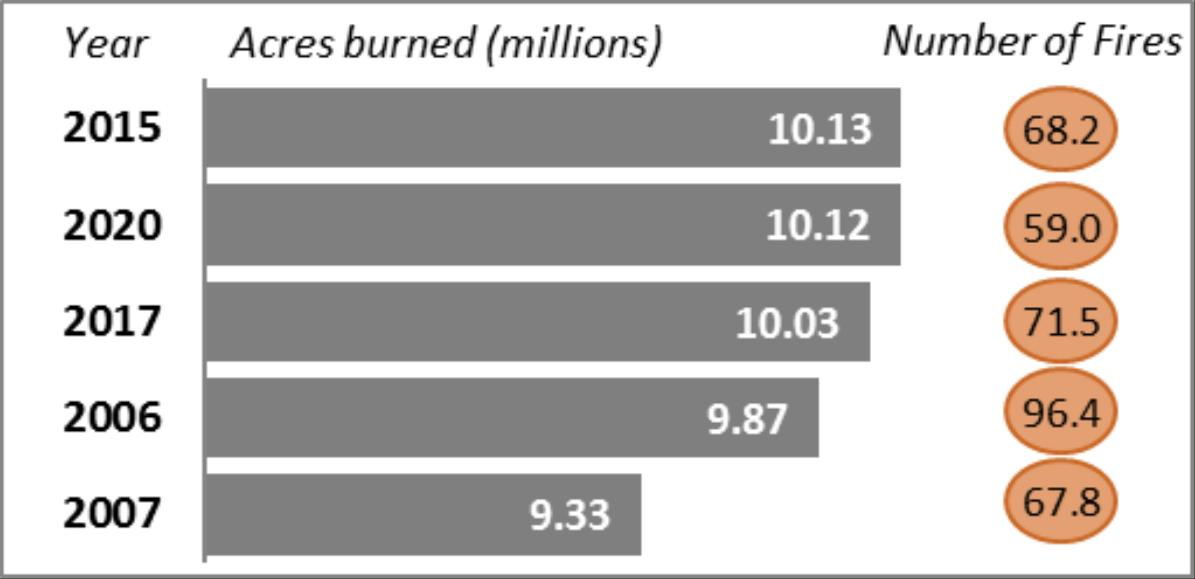

In [ ]:
# Run RAG chain
query = "Analyze the wildfires trend with acres burned over the years"
multimodal_rag_qa(query)

Answer:


I don't know the answer.

----------------------------------------------------------------------------------------------------
Sources:


Figure 4. Acreage Burned by Region and Ownership

Acres burned, millions East Nonfederal East Federal West Nonfederal West Federal 2018 2019 2020 2021 2022

2019 2020 2021 2022 Structures Burned 963 17,904 5,972 2,717 % Residences 46% 54% 60% 46%

Source: NICC Wildland Fire Summary and Statistics annual reports.

Conflagrations

Of the 1.6 million wildfires that have occurred since 2000, 254 exceeded 100,000 acres burned and 16 exceeded 500,000 acres burned. A small fraction of wildfires become catastrophic, and a small percentage of fires accounts for the vast majority of acres burned. For example, about 1% of wildfires become conflagrations—raging, destructive fires—but predicting which fires will “blow up” into conflagrations is challenging and depends on a multitude of factors, such as weather and geography. There have been 1,041 large or significant fires annually on average from 2018 through 2022. In 2022, 2% of wildfires were classified as large or significant (1,289); 45 exceeded 40,000 acres in size, and 17 exceeded 100,000 acres. For context, there were fewer large or significant wildfires in 2021 (943) but more in 2017 (1,409).

Issues for Congress

Issues Congress may consider include the strategies and resources used for wildfire prevention, mitigation, and management, as well as wildfires’ impact on both the quality of life and the economies of communities affected by wildfire activity. Other issues relate to post-wildfire recovery and site restoration. Congress also considers the total federal cost of wildfire management, including the cost of suppression operations; these costs vary annually and are difficult to predict.

Source: NICC Wildland Fire Summary and Statistics annual reports. Notes: West: AK, AZ, CA, CO, ID, HI, MT, NM, NV, OR, UT, WA, and WY. East: All other states and Puerto Rico.

Katie Hoover, Specialist in Natural Resources Policy Laura A. Hanson, Senior Research Librarian

IF10244

https://crsreports.congress.gov

Wildfire Statistics

Figure 2. Top Five Years with Largest Wildfire Acreage Burned Since 1960

Table 1. Annual Wildfires and Acres Burned

2018 2019 2020 Number of Fires (thousands) Federal 12.5 10.9 14.4 FS 5.6 5.3 6.7 DOI 7.0 5.3 7.6 2021 14.0 6.2 7.6 11.7 5.9 5.8 Other 0.1 0.2 <0.1 0.2 0.1 Nonfederal 45.6 39.6 44.6 45.0 57.2 Total 58.1 50.5 59.0 59.0 69.0 Acres Burned (millions) Federal 4.6 3.1 7.1 5.2 4.0 FS 2.3 0.6 4.8 4.1 1.9 DOI 2.3 2.3 2.3 1.0 2.1 Other <0.1 <0.1 <0.1 <0.1 <0.1 Nonfederal 4.1 1.6 3.1 1.9 3.6 Total 8.8 4.7 10.1 7.1 7.6

Source: National Interagency Coordination Center (NICC) Wildland Fire Summary and Statistics annual reports. Notes: FS = Forest Service; DOI = Department of the Interior. Column totals may not sum precisely due to rounding.

2022

Year Number of Fires 2015 Acres burned (millions) 2020 2017 2006 2007

Source: NICC Wildland Fire Summary and Statistics annual reports. Note: Number of fires in thousands.

The number of fires and acreage burned are indicators of the annual level of wildfire activity. These numbers may not be indicative of fire’s impact on human development or communities, since many fires occur in large, relatively undeveloped areas. Acreage burned also does not indicate the severity of a wildfire, the degree of impact upon forests or soils, or other ecological effects.

Most wildfires are human-caused (89% of the average number of wildfires from 2018 to 2022). Wildfires caused by lightning tend to be slightly larger and to burn more acreage (53% of the average acreage burned from 2018 to 2022) than human-caused fires.

https://crsreports.congress.gov

Wildfire Statistics

In 2022, 52% of the nationwide acreage burned by wildfires was on federal lands (4.0 million acres; see Table 1), lower than the 10-year average (64%) of impacted federal land acreage. The other 48% of the acreage burned in 2022 was on state, local, or privately owned lands, though the fires on these lands accounted for 83% of total fires. Of the federal acreage burned nationwide in 2022, 52% (2.1 million acres) burned on DOI land and 47% (1.9 million acres) burned on FS land (see Figure 3). The 2022 figures are driven largely by Alaska, where just over half of the acreage impacted occurred on nonfederal lands (1.6 million acres) and just under half was on DOI lands (1.5 million acres).

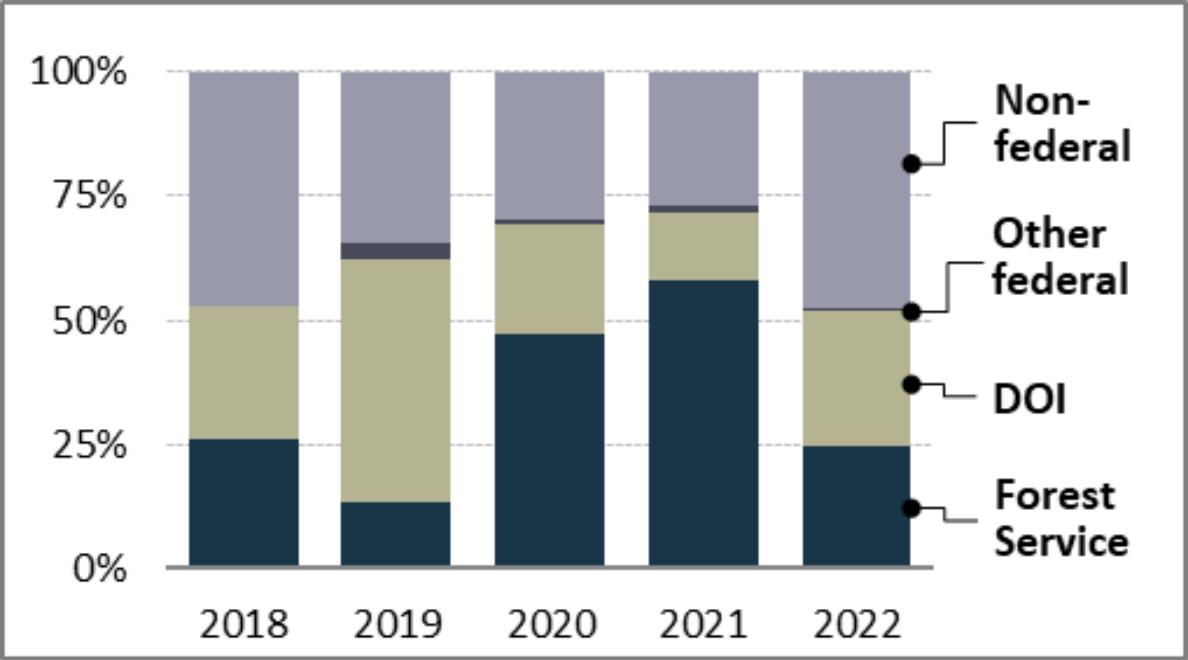

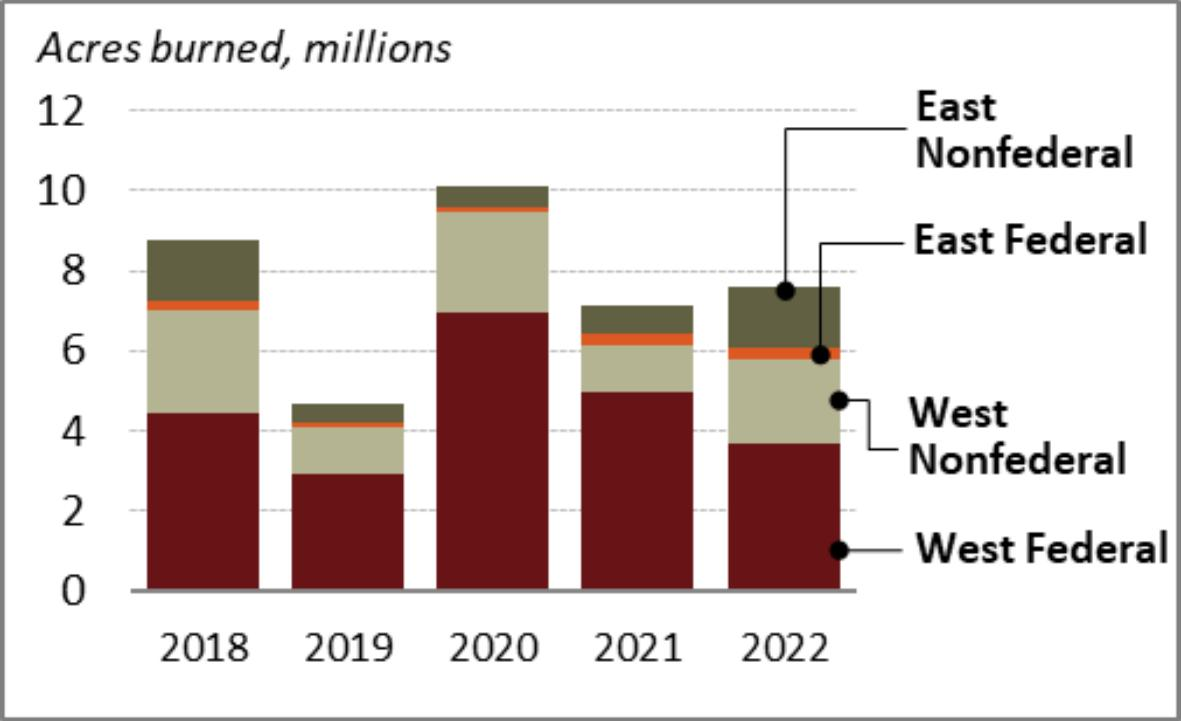

In [ ]:
# Run RAG chain
query = "which teams are the part of ICC t20 worldcup 2026"
multimodal_rag_qa(query)